<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/colab/scalability_and_speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn import cluster, datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

In [6]:
# Denmune's Paramaters
knn = 25 # k-nearest neighbor, the only parameter required by the algorithm
data_scale = []

for n in range(1000, 100000, 1000):
    n_samples = n
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
    
    data= noisy_circles[0]
    data_labels = noisy_circles[1]
    dm = DenMune(train_data=data, k_nearest=knn, rgn_tsne=True)
    labels, validity = dm.fit_predict(show_noise=True, show_analyzer=False, show_plots=False)
    time_exec = dm.analyzer['exec_time']['DenMune']
    data_scale.append([n, time_exec ])

    print('data size:',n ,  'time:' , round(time_exec,4), 'seconds')
    

data size: 1000 time: 0.4518 seconds
data size: 2000 time: 0.93 seconds
data size: 3000 time: 1.3754 seconds
data size: 4000 time: 2.0891 seconds
data size: 5000 time: 2.8772 seconds
data size: 6000 time: 4.5046 seconds
data size: 7000 time: 5.7184 seconds
data size: 8000 time: 4.836 seconds
data size: 9000 time: 7.793 seconds
data size: 10000 time: 8.3138 seconds
data size: 11000 time: 8.7401 seconds
data size: 12000 time: 9.8531 seconds
data size: 13000 time: 11.2796 seconds
data size: 14000 time: 13.4036 seconds
data size: 15000 time: 16.6113 seconds
data size: 16000 time: 14.4252 seconds
data size: 17000 time: 20.697 seconds
data size: 18000 time: 18.1152 seconds
data size: 19000 time: 22.1096 seconds
data size: 20000 time: 25.8013 seconds
data size: 21000 time: 26.6907 seconds
data size: 22000 time: 27.0235 seconds
data size: 23000 time: 27.3918 seconds
data size: 24000 time: 38.0108 seconds
data size: 25000 time: 41.3266 seconds
data size: 26000 time: 36.7593 seconds
data size: 2

In [8]:
# compouting moving average to smooth the curve
x, y = zip(*data_scale)
window = 5
cumsum, moving_aves = [0], []

for i, n in enumerate(y, 1):
    cumsum.append(cumsum[i-1] + n)
    if i>=window:
        moving_ave = (cumsum[i] - cumsum[i-window])/window
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
y = moving_aves        

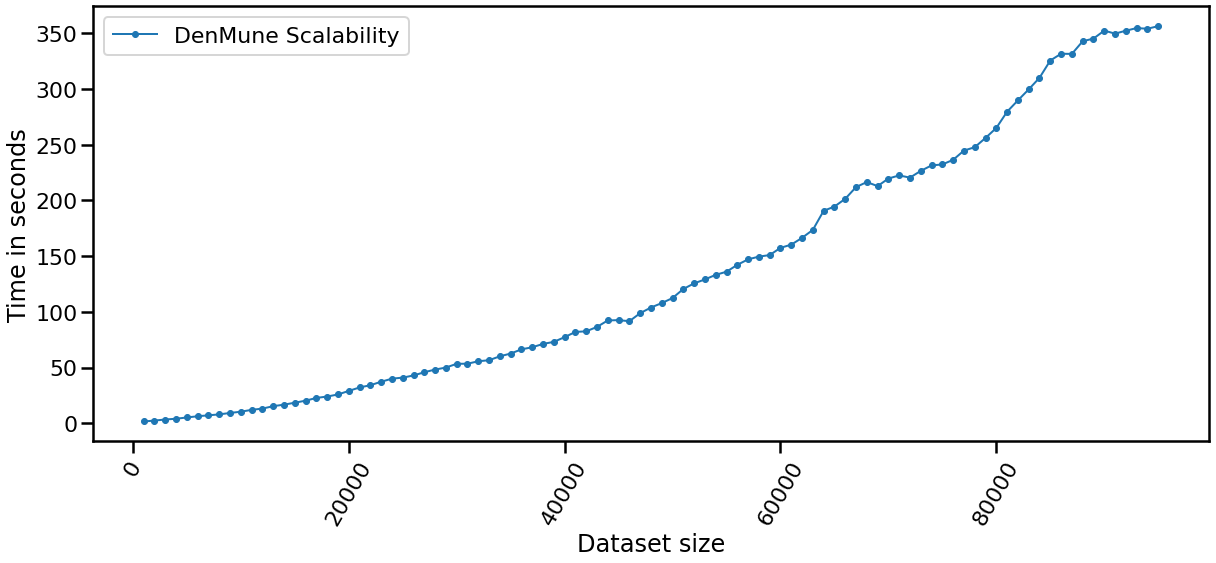

In [11]:
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 8])
ax.plot(x[:-window+1], y, marker='.', linewidth=2, label='DenMune Scalability')
plt.xticks(rotation=60)
ax.set_xlabel('Dataset size')
ax.set_ylabel('Time in seconds')
plt.legend()
plt.show()